In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely.geometry 
import numpy as np
from shapely import geometry as gmty
from geofeather import to_geofeather, from_geofeather
import glob
import os
import pyarrow
from xclim import ensembles as ens
from xclim import subset

In [2]:
import matplotlib.pyplot as plt

In [3]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"

# Select and open Region (Shapefile)

In [4]:
shapefile = ("/home/mlopez/EXEC/Shapefiles/DDE_STF_20K_REG_FOR_VUE_S.shp")
poly = gpd.read_file(shapefile)
poly= poly.to_crs('epsg:4326')
poly

,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL,geometry
0,1,01,BAS-SAINT-LAURENT,"011, 012",27645.7,2019-11-30,1.018112e+06,2.743725e+10,Sud-est,"POLYGON ((-68.24266 48.85438, -68.18955 48.875..."
1,2,02,SAGUENAY -LAC-SAINT-JEAN,"023, 024, 025, 027",102315.5,2019-11-30,2.642611e+06,1.011782e+11,Nord-est,"POLYGON ((-71.02818 52.21282, -71.02784 52.213..."
2,3,03,CAPITALE-NATIONALE-CHAUDIÈRE-APPALACHES,"035, 037",35573.9,2019-11-30,1.295862e+06,3.544054e+10,Centre du Québec,"POLYGON ((-70.24926 46.12110, -70.24936 46.120..."
3,4,04,MAURICIE-CENTRE-DU-QUÉBEC,"041, 042",52443.7,2019-11-30,1.903121e+06,5.216317e+10,Centre du Québec,"POLYGON ((-72.70529 45.75959, -72.70536 45.759..."
4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud,"POLYGON ((-72.27288 45.61310, -72.27288 45.613..."
5,6,07,OUTAOUAIS,"071, 072, 073, 074",39030.0,2019-11-30,1.677902e+06,3.893718e+10,Sud-ouest,"POLYGON ((-74.72535 45.85802, -74.72646 45.852..."
6,7,08,ABITIBI-TEMISCAMINGUE,"081, 082, 083, 084, 085, 086",57124.2,2019-11-30,1.961835e+06,5.674050e+10,Nord-ouest,"POLYGON ((-77.86075 46.21053, -77.86104 46.210..."
7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est,"POLYGON ((-70.02990 52.89020, -67.32805 52.884..."
8,9,10,NORD-DU-QUEBEC,"102, 105, 106, 107",0.1,2019-11-30,1.858192e+03,1.456492e+05,Nord-ouest,"POLYGON ((-78.76555 48.69057, -78.76556 48.690..."
9,10,10,NORD-DU-QUEBEC,"102, 105, 106, 107",48.3,2019-11-30,3.542201e+04,4.789565e+07,Nord-ouest,"POLYGON ((-78.65906 48.69034, -78.66015 48.690..."


# Select variable

In [5]:
#Variable 
variable85="rcp85_tg_mean_seasonal"
variable45="rcp45_tg_mean_seasonal"
#variable="rcp[48]5_tg_mean_annual"

files85 = glob.glob(folder+"*"+variable85+".nc")
files45 = glob.glob(folder+"*"+variable45+".nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
files85
files45


['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp45_tg_mean_seasonal.nc',
 '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp45_tg_mean_seasonal.nc']

# Open Mask if already created or create it. 

In [7]:
dsEns45= ens.create_ensemble(files45)
#dsEnsSeas45 = ens.create_ensemble(filesSeas)
dsEns45
if os.path.exists(shapefile.replace('.shp','.nc')):
    mask45 = xr.open_dataset(shapefile.replace('.shp','.nc'))
    mask45 = mask45.__xarray_dataarray_variable__
    
else:
    mask45= subset.create_mask(poly=poly, x_dim=dsEns45.lon, y_dim=dsEns45.lat)
    mask45 = mask.T
    mask45.to_netcdf(shapefile.replace('.shp','.nc'))

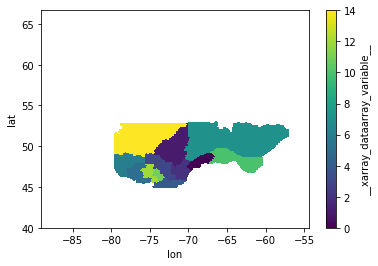

In [9]:
mask45.plot()

# Figure - Time Series

In [11]:
# figure
dsEns45 = dsEns45.assign_coords({'region':mask45})
# spatial means - grouby region mask
out45 = dsEns45.groupby(dsEns45.region).mean()
print(out45)
# Calculate ensembles percentiles on regional means
perctiles45 = ens.ensemble_percentiles(out45)
perctiles45

<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 605)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2100-12-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean      (region, realization, time) float32 dask.array<chunksize=(1, 1, 10), meta=np.ndarray>


<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 605)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2100-12-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean_p10  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p50  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p90  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>

In [12]:
%time dfper145 = perctiles45.to_dataframe().dropna()
dfper145

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



CPU times: user 42 s, sys: 13.2 s, total: 55.2 s
Wall time: 38.5 s


tg_mean_p10  tg_mean_p50  tg_mean_p90
realization region time                                             
0           0.0    1950-03-01   272.351410   273.636658   275.454956
                   1950-06-01   287.888824   288.813385   289.576019
                   1950-09-01   275.605469   276.786072   278.082581
                   1950-12-01   259.028046   260.178772   260.985931
                   1951-03-01   272.359100   273.996948   274.968475
...                                    ...          ...          ...
10          14.0   2099-09-01   277.660461   278.612061   279.437134
                   2099-12-01   257.403961   259.616425   261.795197
                   2100-03-01   270.113922   272.617981   275.340790
                   2100-06-01   288.234192   289.922699   290.681183
                   2100-09-01   277.677185   279.034912   279.886536

[86229 rows x 3 columns]

In [14]:
%time dfper45 = perctiles45.drop('realization').to_dataframe().dropna()
dfper45

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



CPU times: user 43.6 s, sys: 12.1 s, total: 55.7 s
Wall time: 37.5 s


tg_mean_p10  tg_mean_p50  tg_mean_p90
region time                                             
0.0    1950-03-01   272.351410   273.636658   275.454956
       1950-06-01   287.888824   288.813385   289.576019
       1950-09-01   275.605469   276.786072   278.082581
       1950-12-01   259.028046   260.178772   260.985931
       1951-03-01   272.359100   273.996948   274.968475
...                        ...          ...          ...
14.0   2099-09-01   277.660461   278.612061   279.437134
       2099-12-01   257.403961   259.616425   261.795197
       2100-03-01   270.113922   272.617981   275.340790
       2100-06-01   288.234192   289.922699   290.681183
       2100-09-01   277.677185   279.034912   279.886536

[7839 rows x 3 columns]

In [15]:
dfmean45 = dfper45.reset_index()
dfmean45

,region,time,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,0.0,1950-03-01,272.351410,273.636658,275.454956
1,0.0,1950-06-01,287.888824,288.813385,289.576019
2,0.0,1950-09-01,275.605469,276.786072,278.082581
3,0.0,1950-12-01,259.028046,260.178772,260.985931
4,0.0,1951-03-01,272.359100,273.996948,274.968475
...,...,...,...,...,...
7834,14.0,2099-09-01,277.660461,278.612061,279.437134
7835,14.0,2099-12-01,257.403961,259.616425,261.795197
7836,14.0,2100-03-01,270.113922,272.617981,275.340790
7837,14.0,2100-06-01,288.234192,289.922699,290.681183


In [16]:
dfmean452 = dfmean45.groupby(["time"]).mean()
dfmean452.reset_index()

,time,region,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,1950-03-01,6.461538,271.893705,273.948841,275.256974
1,1950-06-01,6.461538,287.707564,288.633838,289.580454
2,1950-09-01,6.461538,275.283813,276.399834,277.886803
3,1950-12-01,6.461538,256.684853,258.407605,259.949829
4,1951-03-01,6.461538,271.304011,272.951437,274.518473
...,...,...,...,...,...
598,2099-09-01,6.461538,279.997000,280.823782,281.967750
599,2099-12-01,6.461538,260.888188,264.381676,266.491702
600,2100-03-01,6.461538,273.433817,276.216924,278.367138
601,2100-06-01,6.461538,290.198144,291.705491,292.516069


In [17]:
dfmean452

,region,tg_mean_p10,tg_mean_p50,tg_mean_p90
time,,,,
1950-03-01,6.461538,271.893705,273.948841,275.256974
1950-06-01,6.461538,287.707564,288.633838,289.580454
1950-09-01,6.461538,275.283813,276.399834,277.886803
1950-12-01,6.461538,256.684853,258.407605,259.949829
1951-03-01,6.461538,271.304011,272.951437,274.518473
...,...,...,...,...
2099-09-01,6.461538,279.997000,280.823782,281.967750
2099-12-01,6.461538,260.888188,264.381676,266.491702
2100-03-01,6.461538,273.433817,276.216924,278.367138


In [18]:
def polysmooth(years, y, degree):
    coef = np.polyfit(years, y, degree)
    return np.polyval(coef,years)

In [20]:
years = dfmean452.reset_index().time.dt.year
#years

In [25]:
#years.values

In [26]:
df452 = dfmean452.reset_index()

In [27]:
df452

,time,region,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,1950-03-01,6.461538,271.893705,273.948841,275.256974
1,1950-06-01,6.461538,287.707564,288.633838,289.580454
2,1950-09-01,6.461538,275.283813,276.399834,277.886803
3,1950-12-01,6.461538,256.684853,258.407605,259.949829
4,1951-03-01,6.461538,271.304011,272.951437,274.518473
...,...,...,...,...,...
598,2099-09-01,6.461538,279.997000,280.823782,281.967750
599,2099-12-01,6.461538,260.888188,264.381676,266.491702
600,2100-03-01,6.461538,273.433817,276.216924,278.367138
601,2100-06-01,6.461538,290.198144,291.705491,292.516069


In [99]:
#dfmean452.to_csv("dfmean.csv")

In [28]:
rp1= polysmooth(years,dfmean452.tg_mean_p10 - 273.15,4)
rp5 = polysmooth(years,dfmean452.tg_mean_p50 - 273.15,4)
rp9 = polysmooth(years,dfmean452.tg_mean_p90 - 273.15,4)

## Create DF to plot TimeSeries graph in R

In [29]:
df = pd.DataFrame()
df["time"] = years.values


In [30]:
df["tg_mean_p10"] = rp1
df["tg_mean_p50"] = rp5
df["tg_mean_p90"] = rp9

### TODO:
- This dataframe should include both models (RCP 4.5 nad 8.5) and observations (historic)
- I should add labels and similar colors into the shiny graph

In [110]:
df.to_csv("p4tgmean.csv")

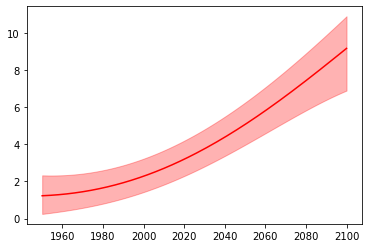

In [87]:
plt.plot(years, rp5, markersize='10', color='red')
plt.fill_between(years, polysmooth(years, dfmean2.tg_mean_p10- 273.15,4), polysmooth(years, dfmean2.tg_mean_p90- 273.15,4), alpha=0.3, color='red')

In [95]:
dfmean2.to_csv("timeseries.csv")

### NOTE: this example was for the whole region. 
### TODO: 
- Split DF by regions and get same graph for each region
- Convert degrees in Celsius